# Fastag Fraud Detection

## Project Pipeline

1. **Data Exploration**:
   - Explore the dataset to understand the distribution of features and the prevalence of fraud indicators.

2. **Feature Engineering**:
   - Identify and engineer relevant features that contribute to fraud detection accuracy.

3. **Model Development**:
   - Build a machine learning classification model to predict and detect Fastag transaction fraud.
   - Evaluate and fine-tune model performance using appropriate metrics.

4. **Real-time Fraud Detection**:
   - Explore the feasibility of implementing the model for real-time Fastag fraud detection.

5. **Explanatory Analysis**:
   - Provide insights into the factors contributing to fraudulent transactions.

## Dataset Description

The dataset contains the following columns:

1. **Transaction_ID**: Unique identifier for each transaction.
2. **Timestamp**: Date and time of the transaction.
3. **Vehicle_Type**: Type of vehicle involved in the transaction.
4. **FastagID**: Unique identifier for Fastag.
5. **TollBoothID**: Identifier for the toll booth.
6. **Lane_Type**: Type of lane used for the transaction.
7. **Vehicle_Dimensions**: Dimensions of the vehicle.
8. **Transaction_Amount**: Amount associated with the transaction.
9. **Amount_paid**: Amount paid for the transaction.
10. **Geographical_Location**: Location details of the transaction.
11. **Vehicle_Speed**: Speed of the vehicle during the transaction.
12. **Vehicle_Plate_Number**: License plate number of the vehicle.
13. **Fraud_indicator**: Binary indicator of fraudulent activity (target variable).


# Exploratory Data Analysis (EDA)

In [67]:
# Let's import libraries
import pandas as pd

In [68]:
df = pd.read_csv('/content/FastagFraudDetection.csv')

In [69]:
# Let's look at columns
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [70]:
# Let's look at first 5 rows
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [71]:
# Let's check up missing value
df.isnull().any()

Transaction_ID           False
Timestamp                False
Vehicle_Type             False
FastagID                  True
TollBoothID              False
Lane_Type                False
Vehicle_Dimensions       False
Transaction_Amount       False
Amount_paid              False
Geographical_Location    False
Vehicle_Speed            False
Vehicle_Plate_Number     False
Fraud_indicator          False
dtype: bool

In [72]:
# Let's check up missing value count
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [73]:
# Let's look at shape of dataframe
df.shape

(5000, 13)

In [74]:
# Let's look at number of unique values
df.nunique()

Transaction_ID           5000
Timestamp                4423
Vehicle_Type                7
FastagID                 4451
TollBoothID                 6
Lane_Type                   2
Vehicle_Dimensions          3
Transaction_Amount         20
Amount_paid                23
Geographical_Location       5
Vehicle_Speed              85
Vehicle_Plate_Number     5000
Fraud_indicator             2
dtype: int64

In [75]:
for i in df.columns:
  print(f'{i}: {df[i].unique()[:15]}')

Transaction_ID: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Timestamp: ['1/6/2023 11:20' '1/7/2023 14:55' '1/8/2023 18:25' '1/9/2023 2:05'
 '1/10/2023 6:35' '1/11/2023 10:00' '1/12/2023 15:40' '1/13/2023 20:15'
 '1/14/2023 1:55' '1/15/2023 7:30' '1/16/2023 12:10' '1/17/2023 17:45'
 '1/18/2023 22:20' '1/19/2023 4:00' '1/20/2023 8:30']
Vehicle_Type: ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
FastagID: ['FTG-001-ABC-121' 'FTG-002-XYZ-451' nan 'FTG-044-LMN-322'
 'FTG-505-DEF-652' 'FTG-066-GHI-987' 'FTG-707-JKL-210' 'FTG-088-UVW-543'
 'FTG-909-RST-876' 'FTG-021-QWE-765' 'FTG-011-ZXC-431' 'FTG-013-POI-104'
 'FTG-014-KJH-872' 'FTG-055-DCV-543' 'FTG-066-NBH-210']
TollBoothID: ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Lane_Type: ['Express' 'Regular']
Vehicle_Dimensions: ['Large' 'Small' 'Medium']
Transaction_Amount: [350 120   0 140 160 180 290 110 100 130  60 150 340 300  70]
Amount_paid: [120 100   0 160  90 180 350 140 110  60 290 130  70 190 150]
Geographical_Locatio

In [11]:
# Let's look at info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [12]:
# Let's look at descriptive statistic methods of dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Transaction_Amount,5000.0,161.0620,112.449950,0.0,100.00,130.0,290.00,350.0
Amount_paid,5000.0,141.2610,106.480996,0.0,90.00,120.0,160.00,350.0
Vehicle_Speed,5000.0,67.8512,16.597547,10.0,54.00,67.0,82.00,118.0


In [11]:
# Let's look at data types of columns
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

# Feature Engineering

In [ ]:
df.head(2)

,Transaction_ID,Timestamp,FastagID,TollBoothID,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,...,Lane_Type_Regular,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Vehicle_Speed_group_21-41,Vehicle_Speed_group_41-93,Vehicle_Speed_group_93-103,Vehicle_Speed_group_<= 21,Transaction_Amount_group_330 <,Transaction_Amount_group_60-180,Transaction_Amount_group_<= 60
0,1,1/6/2023 11:20,FTG-001-ABC-121,101,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,1,...,False,False,False,False,True,False,False,True,False,False
1,2,1/7/2023 14:55,FTG-002-XYZ-451,102,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,1,...,True,False,True,False,True,False,False,False,True,False


In [13]:
# # Let's seperate location column to long and lat
# df[['lat', 'long']] = df['Geographical_Location'].apply(lambda x: pd.Series(x.split(',')))

In [76]:
# Let's find which percent are paid
df['Percent_paid'] = df.apply(lambda row: row['Amount_paid'] / row['Transaction_Amount'] if row['Transaction_Amount'] != 0 else 0, axis=1)

In [77]:
# Let's convert fraud column to int data type
df['Fraud_indicator'] = df['Fraud_indicator'].replace({'Fraud':1, 'Not Fraud':0})

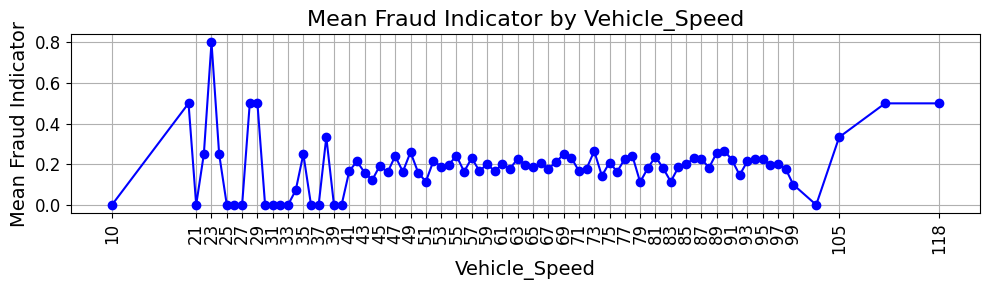

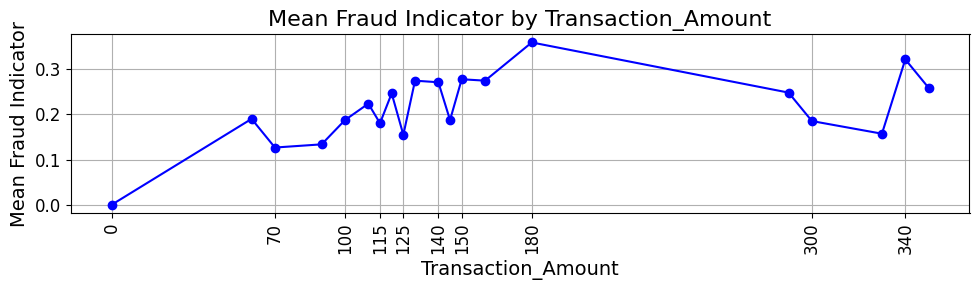

In [ ]:
# Let's choose right group for age group
import matplotlib.pyplot as plt
for i in ['Vehicle_Speed', 'Transaction_Amount']:
    age_salary_mean = df.groupby(by=i).aggregate({'Fraud_indicator': 'mean'})
    plt.figure(figsize=(10, 3))
    plt.plot(age_salary_mean.index, age_salary_mean['Fraud_indicator'], marker='o', linestyle='-', color='b', label='Mean Fraud Indicator')
    plt.title(f'Mean Fraud Indicator by {i}', fontsize=16)
    plt.xlabel(f'{i}', fontsize=14)
    plt.ylabel('Mean Fraud Indicator', fontsize=14)
    step_size = 2
    plt.xticks(age_salary_mean.index[::step_size], fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [78]:
# Let's also group Vehicle_Speed, Transaction_Amount columns
def Vehicle_Speed_group(speed):
  if speed <= 21:
    return '<= 21'
  elif speed <= 41:
    return '21-41'
  elif speed <= 93:
    return '41-93'
  elif speed <= 103:
    return '93-103'
  else:
    return '103 <'

def Transaction_Amount_group(amount):
  if amount <= 60:
    return '<= 60'
  elif amount <= 180:
    return '60-180'
  elif amount <= 330:
    return '180-330'
  else:
    return '330 <'

df['Vehicle_Speed_group'] = df['Vehicle_Speed'].apply(lambda x: Vehicle_Speed_group(x))
df['Transaction_Amount_group'] = df['Transaction_Amount'].apply(lambda x: Transaction_Amount_group(x))

In [79]:
# Let's encode categorical features
df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type','TollBoothID', 'Vehicle_Dimensions','Vehicle_Speed_group','Transaction_Amount_group'], drop_first=True)

# Data Preprocessing

In [ ]:
df.head()

,Transaction_ID,Timestamp,FastagID,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,lat,...,TollBoothID_D-106,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Vehicle_Speed_group_21-41,Vehicle_Speed_group_41-93,Vehicle_Speed_group_93-103,Vehicle_Speed_group_<= 21,Transaction_Amount_group_330 <,Transaction_Amount_group_60-180,Transaction_Amount_group_<= 60
0,1,1/6/2023 11:20,FTG-001-ABC-121,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,1,13.059816123454882,...,False,False,False,False,True,False,False,True,False,False
1,2,1/7/2023 14:55,FTG-002-XYZ-451,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,1,13.059816123454882,...,False,False,True,False,True,False,False,False,True,False
2,3,1/8/2023 18:25,NaN,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,0,13.059816123454882,...,False,False,True,False,True,False,False,False,False,True
3,4,1/9/2023 2:05,FTG-044-LMN-322,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,1,13.059816123454882,...,False,False,False,False,True,False,False,True,False,False
4,5,1/10/2023 6:35,FTG-505-DEF-652,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,1,13.059816123454882,...,False,True,False,False,True,False,False,False,True,False


In [80]:
# Let's first remove unnecessary columns
df.drop(columns = ['Transaction_ID','Timestamp','FastagID','Geographical_Location','Vehicle_Plate_Number'], inplace = True)

In [81]:
# Let's handle missing values
df.isnull().sum()

Transaction_Amount                 0
Amount_paid                        0
Vehicle_Speed                      0
Fraud_indicator                    0
Percent_paid                       0
Vehicle_Type_Car                   0
Vehicle_Type_Motorcycle            0
Vehicle_Type_SUV                   0
Vehicle_Type_Sedan                 0
Vehicle_Type_Truck                 0
Vehicle_Type_Van                   0
Lane_Type_Regular                  0
TollBoothID_B-102                  0
TollBoothID_C-103                  0
TollBoothID_D-104                  0
TollBoothID_D-105                  0
TollBoothID_D-106                  0
Vehicle_Dimensions_Medium          0
Vehicle_Dimensions_Small           0
Vehicle_Speed_group_21-41          0
Vehicle_Speed_group_41-93          0
Vehicle_Speed_group_93-103         0
Vehicle_Speed_group_<= 21          0
Transaction_Amount_group_330 <     0
Transaction_Amount_group_60-180    0
Transaction_Amount_group_<= 60     0
dtype: int64

In [82]:
# Let's convert all bool to int
for col in df.select_dtypes(include=['bool', 'object']):
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        df[col] = df[col].astype(float).round().astype(int)

Okey Great !!!✅

In [20]:
# Let's check unique values for each columns
for i in df.columns:
  print(f'{i}: [{df[i].nunique()}]')

Transaction_Amount: [20]
Amount_paid: [23]
Vehicle_Speed: [85]
Fraud_indicator: [2]
lat: [1]
long: [2]
Percent_paid: [84]
Vehicle_Type_Car: [2]
Vehicle_Type_Motorcycle: [2]
Vehicle_Type_SUV: [2]
Vehicle_Type_Sedan: [2]
Vehicle_Type_Truck: [2]
Vehicle_Type_Van: [2]
Lane_Type_Regular: [2]
TollBoothID_B-102: [2]
TollBoothID_C-103: [2]
TollBoothID_D-104: [2]
TollBoothID_D-105: [2]
TollBoothID_D-106: [2]
Vehicle_Dimensions_Medium: [2]
Vehicle_Dimensions_Small: [2]
Vehicle_Speed_group_21-41: [2]
Vehicle_Speed_group_41-93: [2]
Vehicle_Speed_group_93-103: [2]
Vehicle_Speed_group_<= 21: [2]
Transaction_Amount_group_330 <: [2]
Transaction_Amount_group_60-180: [2]
Transaction_Amount_group_<= 60: [2]


In [ ]:
df.dtypes

Transaction_Amount                   int64
Amount_paid                          int64
Vehicle_Speed                        int64
Fraud_indicator                      int64
lat                                 object
long                                object
Percent_paid                       float64
Vehicle_Type_Car                     int64
Vehicle_Type_Motorcycle              int64
Vehicle_Type_SUV                     int64
Vehicle_Type_Sedan                   int64
Vehicle_Type_Truck                   int64
Vehicle_Type_Van                     int64
Lane_Type_Regular                    int64
TollBoothID_B-102                    int64
TollBoothID_C-103                    int64
TollBoothID_D-104                    int64
TollBoothID_D-105                    int64
TollBoothID_D-106                    int64
Vehicle_Dimensions_Medium            int64
Vehicle_Dimensions_Small             int64
Vehicle_Speed_group_21-41            int64
Vehicle_Speed_group_41-93            int64
Vehicle_Spe

# Machine Learning Model Development

In [83]:
# Let's copy dataset
ml_data = df.copy()

In [84]:
# Let's define target and input value
X = ml_data.drop('Fraud_indicator', axis =1)
y = ml_data['Fraud_indicator']

In [85]:
# Let's divide dataset to train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Let's import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classification": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Classifier:", key)
    print("Accuracy:", round(accuracy * 100, 2), "%")
    print("Precision:", round(precision * 100, 2), "%")
    print("Recall:", round(recall * 100, 2), "%")
    print("F1 Score:", round(f1 * 100, 2), "%")
    print()

Classifier: Logistic Regression
Accuracy: 98.3 %
Precision: 98.34 %
Recall: 98.3 %
F1 Score: 98.27 %

Classifier: K Nearest Neighbors
Accuracy: 99.1 %
Precision: 99.11 %
Recall: 99.1 %
F1 Score: 99.09 %

Classifier: Decision Tree
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %

Classifier: Random Forest
Accuracy: 99.9 %
Precision: 99.9 %
Recall: 99.9 %
F1 Score: 99.9 %

Classifier: Gradient Boosting
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %

Classifier: Support Vector Classification
Accuracy: 98.3 %
Precision: 98.34 %
Recall: 98.3 %
F1 Score: 98.27 %

Classifier: AdaBoost
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %

Classifier: Naive Bayes
Accuracy: 50.0 %
Precision: 82.94 %
Recall: 50.0 %
F1 Score: 51.96 %



In [28]:
# Let's continue DecisionTreeRegressor -> Random Search

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor()

dt_random = RandomizedSearchCV(estimator=dt_regressor, param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

dt_random.fit(X_train, y_train)

print("Best parameters found for Decision Tree Regression:")
print(dt_random.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found for Decision Tree Regression:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


## Decision Tree Classification is the Ideal Model for this Task
If you're looking for a suitable model for this task, Decision Tree Classification stands out as the optimal choice.

In [86]:
import pickle
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

dt.fit(X_train, y_train)

# Let's save the model as a pickle file
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

print("Model saved as dt_model.pkl")

Model saved as dt_model.pkl


In [88]:
X_train.columns

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Percent_paid',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small',
       'Vehicle_Speed_group_21-41', 'Vehicle_Speed_group_41-93',
       'Vehicle_Speed_group_93-103', 'Vehicle_Speed_group_<= 21',
       'Transaction_Amount_group_330 <', 'Transaction_Amount_group_60-180',
       'Transaction_Amount_group_<= 60'],
      dtype='object')

In [59]:
# Let's look at input values
X_train.columns

Index(['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Percent_paid',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small',
       'Vehicle_Speed_group_21-41', 'Vehicle_Speed_group_41-93',
       'Vehicle_Speed_group_93-103', 'Vehicle_Speed_group_<= 21',
       'Transaction_Amount_group_330 <', 'Transaction_Amount_group_60-180',
       'Transaction_Amount_group_<= 60'],
      dtype='object')

# Neural Network Model Development

In [31]:
# Let's copy dataset
nn_data = df.copy()

In [33]:
# Let's define target and input value
X = ml_data.drop('Fraud_indicator', axis =1)
y = ml_data['Fraud_indicator']

In [34]:
# Let's divide dataset to train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model for classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Predict on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision * 100, 2), "%")
print("Recall:", round(recall * 100, 2), "%")
print("F1 Score:", round(f1 * 100, 2), "%")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.4956 - accuracy: 0.7534 - val_loss: 0.3198 - val_accuracy: 0.8625
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8737 - val_loss: 0.2005 - val_accuracy: 0.9225
Epoch 3/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9394 - val_loss: 0.1197 - val_accuracy: 0.9688
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9591 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9675 - val_loss: 0.0674 - val_accuracy: 0.9787
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9737 - val_loss: 0.0511 - val_accuracy: 0.9887
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9806 - val_loss: 0.0468 - val_accuracy: 0.9862
Epoch 

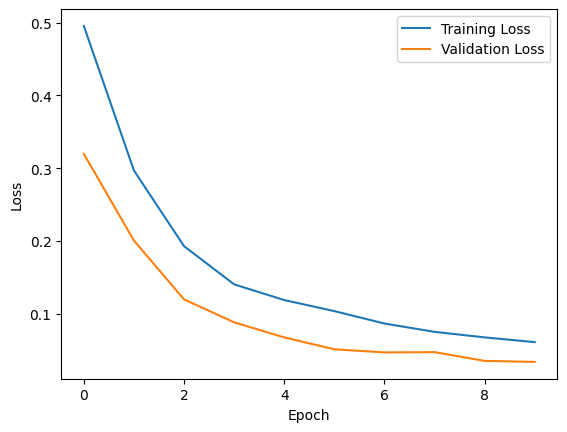

In [37]:
# Optionally, visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Let's predict for Decision Tree Classification
dt_y_pred = dt.predict(X_test)

# Let's calculate evaluation metrics for classification
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')

print("Decision Tree Classification Evaluation Metrics:")
print("Accuracy:", round(dt_accuracy * 100, 2), "%")
print("Precision:", round(dt_precision * 100, 2), "%")
print("Recall:", round(dt_recall * 100, 2), "%")
print("F1 Score:", round(dt_f1 * 100, 2), "%")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))

Decision Tree Classification Evaluation Metrics:
Accuracy: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       217

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# ML Pipelines and Model Deployment

In [ ]:
import pandas as pd
import pickle

# Load the trained Decision Tree Classification model
with open('dt_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# Define preprocessing function
def preprocess_input(data):
    df = pd.DataFrame(data, index=[0])

    # Let's find which percent are paid
    df['Percent_paid'] = df.apply(lambda row: row['Amount_paid'] / row['Transaction_Amount'] if row['Transaction_Amount'] != 0 else 0, axis=1)

    # Let's also group Vehicle_Speed, Transaction_Amount columns
    def Vehicle_Speed_group(speed):
      if speed <= 21:
        return '<= 21'
      elif speed <= 41:
        return '21-41'
      elif speed <= 93:
        return '41-93'
      elif speed <= 103:
        return '93-103'
      else:
        return '103 <'

    def Transaction_Amount_group(amount):
      if amount <= 60:
        return '<= 60'
      elif amount <= 180:
        return '60-180'
      elif amount <= 330:
        return '180-330'
      else:
        return '330 <'

    df['Vehicle_Speed_group'] = df['Vehicle_Speed'].apply(lambda x: Vehicle_Speed_group(x))
    df['Transaction_Amount_group'] = df['Transaction_Amount'].apply(lambda x: Transaction_Amount_group(x))

    # Let's encode categorical features
    df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type','TollBoothID', 'Vehicle_Dimensions','Vehicle_Speed_group','Transaction_Amount_group'], drop_first=True)

    # Let's first remove unnecessary columns
    df.drop(columns = ['Transaction_ID','Timestamp','FastagID','Geographical_Location','Vehicle_Plate_Number'], inplace = True)

    # Let's convert all bool to int
    for col in df.select_dtypes(include=['bool', 'object']):
        try:
            df[col] = df[col].astype(int)
        except ValueError:
            df[col] = df[col].astype(float).round().astype(int)

    columns_to_add = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Percent_paid',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small',
       'Vehicle_Speed_group_21-41', 'Vehicle_Speed_group_41-93',
       'Vehicle_Speed_group_93-103', 'Vehicle_Speed_group_<= 21',
       'Transaction_Amount_group_330 <', 'Transaction_Amount_group_60-180',
       'Transaction_Amount_group_<= 60']

    # Add missing columns with default value of 0
    for column in columns_to_add:
        if column not in df.columns:
            df[column] = 0

    return df

# Define function to detect fraud
def predict_salary(transaction_id, timestamp, vehicle_type, fastag_id, tollbooth_id, lane_type, vehicle_dimensions, transaction_amount, amount_paid, geographical_location, vehicle_speed, vehicle_plate_number):
    # Preprocess input data
    input_data = preprocess_input({
        "Transaction_ID": transaction_id,
        "Timestamp": timestamp,
        "Vehicle_Type": vehicle_type,
        "FastagID": fastag_id,
        "TollBoothID": tollbooth_id,
        "Lane_Type": lane_type,
        "Vehicle_Dimensions": vehicle_dimensions,
        "Transaction_Amount": transaction_amount,
        "Amount_paid": amount_paid,
        "Geographical_Location": geographical_location,
        "Vehicle_Speed": vehicle_speed,
        "Vehicle_Plate_Number": vehicle_plate_number
        })

    input_data = input_data[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Percent_paid',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small',
       'Vehicle_Speed_group_21-41', 'Vehicle_Speed_group_41-93',
       'Vehicle_Speed_group_93-103', 'Vehicle_Speed_group_<= 21',
       'Transaction_Amount_group_330 <', 'Transaction_Amount_group_60-180',
       'Transaction_Amount_group_<= 60']]

    # Predict Fraud using the trained model
    fraud_prediction = dt_model.predict(input_data)
    fraud_prediction = ['Fraud❌' if fraud_prediction[0] == 1 else 'Not Fraud✅']
    result = f'Transaction ID {transaction_id}, the predicted fraud based on your details is {"Fraud" if fraud_prediction[0] == 1 else "Not Fraud"}'
    return result

Deploy (Gradio)

In [43]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.7 MB/s e

In [89]:
import pandas as pd
import pickle
import gradio as gr

# Define preprocessing function
def preprocess_input(data):
    df = pd.DataFrame(data, index=[0])

    # Let's find which percent are paid
    df['Percent_paid'] = df.apply(lambda row: row['Amount_paid'] / row['Transaction_Amount'] if row['Transaction_Amount'] != 0 else 0, axis=1)

    # Let's also group Vehicle_Speed, Transaction_Amount columns
    def Vehicle_Speed_group(speed):
      if speed <= 21:
        return '<= 21'
      elif speed <= 41:
        return '21-41'
      elif speed <= 93:
        return '41-93'
      elif speed <= 103:
        return '93-103'
      else:
        return '103 <'

    def Transaction_Amount_group(amount):
      if amount <= 60:
        return '<= 60'
      elif amount <= 180:
        return '60-180'
      elif amount <= 330:
        return '180-330'
      else:
        return '330 <'

    df['Vehicle_Speed_group'] = df['Vehicle_Speed'].apply(lambda x: Vehicle_Speed_group(x))
    df['Transaction_Amount_group'] = df['Transaction_Amount'].apply(lambda x: Transaction_Amount_group(x))

    # Let's encode categorical features
    df = pd.get_dummies(df, columns=['Vehicle_Type', 'Lane_Type','TollBoothID', 'Vehicle_Dimensions','Vehicle_Speed_group','Transaction_Amount_group'], drop_first=True)

    # Let's first remove unnecessary columns
    df.drop(columns = ['Transaction_ID','Timestamp','FastagID','Geographical_Location','Vehicle_Plate_Number'], inplace = True)

    # Let's convert all bool to int
    for col in df.select_dtypes(include=['bool', 'object']):
        try:
            df[col] = df[col].astype(int)
        except ValueError:
            df[col] = df[col].astype(float).round().astype(int)

    columns_to_add = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Percent_paid',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small',
       'Vehicle_Speed_group_21-41', 'Vehicle_Speed_group_41-93',
       'Vehicle_Speed_group_93-103', 'Vehicle_Speed_group_<= 21',
       'Transaction_Amount_group_330 <', 'Transaction_Amount_group_60-180',
       'Transaction_Amount_group_<= 60']

    # Add missing columns with default value of 0
    for column in columns_to_add:
        if column not in df.columns:
            df[column] = 0

    return df

# Load the trained Decision tree classification model
with open('dt_model.pkl', 'rb') as file:
    dt_model = pickle.load(file)

# Define function to detect fraud
def predict_salary(transaction_id, timestamp, vehicle_type, fastag_id, tollbooth_id, lane_type, vehicle_dimensions, transaction_amount, amount_paid, geographical_location, vehicle_speed, vehicle_plate_number):
    # Preprocess input data
    input_data = preprocess_input({
        "Transaction_ID": transaction_id,
        "Timestamp": timestamp,
        "Vehicle_Type": vehicle_type,
        "FastagID": fastag_id,
        "TollBoothID": tollbooth_id,
        "Lane_Type": lane_type,
        "Vehicle_Dimensions": vehicle_dimensions,
        "Transaction_Amount": transaction_amount,
        "Amount_paid": amount_paid,
        "Geographical_Location": geographical_location,
        "Vehicle_Speed": vehicle_speed,
        "Vehicle_Plate_Number": vehicle_plate_number
        })

    input_data = input_data[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed', 'Percent_paid',
       'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle', 'Vehicle_Type_SUV',
       'Vehicle_Type_Sedan', 'Vehicle_Type_Truck', 'Vehicle_Type_Van',
       'Lane_Type_Regular', 'TollBoothID_B-102', 'TollBoothID_C-103',
       'TollBoothID_D-104', 'TollBoothID_D-105', 'TollBoothID_D-106',
       'Vehicle_Dimensions_Medium', 'Vehicle_Dimensions_Small',
       'Vehicle_Speed_group_21-41', 'Vehicle_Speed_group_41-93',
       'Vehicle_Speed_group_93-103', 'Vehicle_Speed_group_<= 21',
       'Transaction_Amount_group_330 <', 'Transaction_Amount_group_60-180',
       'Transaction_Amount_group_<= 60']]

    # Predict Fraud using the trained model
    fraud_prediction = dt_model.predict(input_data)
    fraud_prediction = ['Fraud❌' if fraud_prediction[0] == 1 else 'Not Fraud✅']
    result = f'Transaction ID {transaction_id}, the predicted fraud based on your details is {"Fraud" if fraud_prediction[0] == 1 else "Not Fraud"}'
    return result


# Define Gradio interface
interface = gr.Interface(
    fn=predict_salary,
    inputs=[
        gr.Textbox(label="Transaction ID"),
        gr.Textbox(label="Timestamp"),
        gr.Dropdown(['Bus ','Car','Motorcycle','Truck','Van','Sedan','SUV'], label="Vehicle_Type"),
        gr.Textbox(label="Fastag ID"),
        gr.Dropdown(['A-101','B-102','D-104','C-103','D-105','D-106'], label="TollBoothID"),
        gr.Dropdown(['Express','Regular'], label="Lane_Type"),
        gr.Dropdown(['Large','Small','Medium'], label="Vehicle_Dimensions"),
        gr.Number(label="Transaction Amount"),
        gr.Number(label="Amount Paid"),
        gr.Textbox(label="Geographical Location"),
        gr.Number(label="Vehicle Speed"),
        gr.Textbox(label="Vehicle Plate Number")
    ],
    outputs=gr.Textbox(label="Predicted Salary"),
    title="Fraud Detection Model",
    description="Enter details to predict salary."
)

# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://abfad13b115a2f01a3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# 🔚The End